In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re


In [2]:
# Load the Dataset
df = pd.read_csv("Twitter Data set.csv")

# Display first 5 rows
print("🔹 First 5 Rows:")
print(df.head())

🔹 First 5 Rows:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [3]:
# Basic Information about the Data
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Shape of Dataset:", df.shape)
print("\n🔹 Column Names:", df.columns.tolist())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

🔹 Shape of Dataset: (162980, 2)

🔹 Column Names: ['clean_text', 'category']


In [4]:
# Summary Statistics
print("\n🔹 Summary Statistics:")
print(df.describe(include='all'))



🔹 Summary Statistics:
       clean_text       category
count      162976  162973.000000
unique     162975            NaN
top          2019            NaN
freq            2            NaN
mean          NaN       0.225436
std           NaN       0.781279
min           NaN      -1.000000
25%           NaN       0.000000
50%           NaN       0.000000
75%           NaN       1.000000
max           NaN       1.000000


In [5]:
# Checking Missing Values and Duplicates
print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Duplicates:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


🔹 Missing Values:
clean_text    4
category      7
dtype: int64

🔹 Duplicates: 2


In [6]:
# Exploring Tweet Lengths
if 'tweet' in df.columns:
    df['tweet_length'] = df['tweet'].astype(str).apply(len)
    print("\n🔹 Average Tweet Length:", df['tweet_length'].mean())

    # Plot tweet length distribution
    plt.figure(figsize=(8,5))
    sns.histplot(df['tweet_length'], bins=30, kde=True)
    plt.title("Tweet Length Distribution")
    plt.xlabel("Length of Tweet")
    plt.ylabel("Count")
    plt.show()

In [7]:
# Cleaning Tweets (Basic Text Cleaning)
def clean_tweet(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)        # Remove URLs
    text = re.sub(r"@\w+", "", text)           # Remove mentions
    text = re.sub(r"#", "", text)              # Remove hashtags symbol
    text = re.sub(r"[^A-Za-z0-9\s]", "", text) # Remove special characters
    text = text.lower()                        # Lowercase
    return text

In [9]:
df['clean_tweet'] = df['clean_text'].apply(clean_tweet)

In [10]:
print("\n🔹 Cleaned Tweets Sample:")
print(df['clean_tweet'].head())



🔹 Cleaned Tweets Sample:
0    when modi promised minimum government maximum ...
1    talk all the nonsense and continue all the dra...
2    what did just say vote for modi  welcome bjp t...
3    asking his supporters prefix chowkidar their n...
4    answer who among these the most powerful world...
Name: clean_tweet, dtype: object


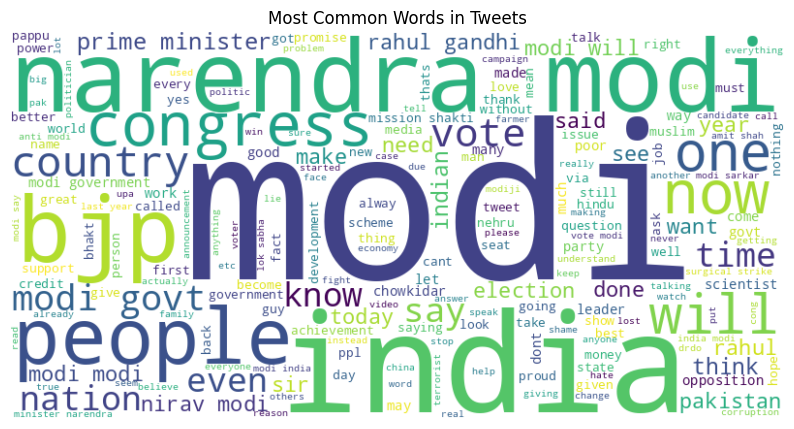

In [11]:
# Most Common Words (Word Cloud)
all_words = ' '.join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

In [13]:
# Hashtag Analysis
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

df['hashtags'] = df['clean_text'].apply(lambda x: extract_hashtags(str(x)))

In [14]:
# Flatten list of hashtags
hashtags_series = pd.Series([tag for tags in df['hashtags'] for tag in tags])

top_hashtags = hashtags_series.value_counts().head(10)
print("\n🔹 Top 10 Hashtags:\n", top_hashtags)



🔹 Top 10 Hashtags:
 Series([], Name: count, dtype: int64)


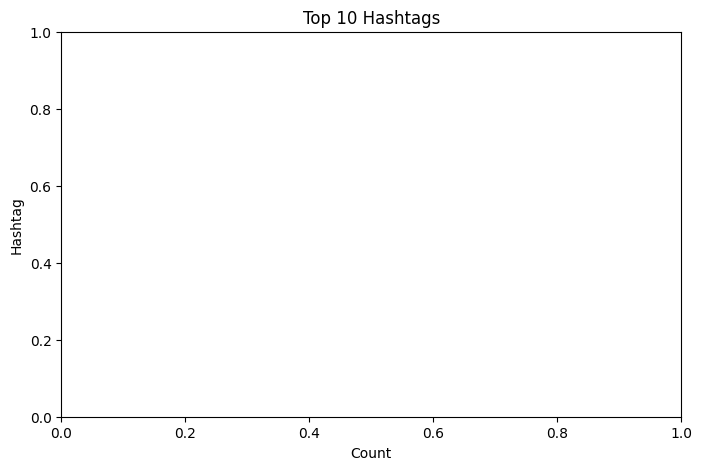

In [15]:
# Plot Top Hashtags
plt.figure(figsize=(8,5))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='viridis')
plt.title("Top 10 Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

In [16]:
# Sentiment Analysis (Optional if column exists)
if 'sentiment' in df.columns:
    print("\n🔹 Sentiment Value Counts:")
    print(df['sentiment'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(x='sentiment', data=df, palette='coolwarm')
    plt.title("Sentiment Distribution")
    plt.show()
else:
    print("\n No 'sentiment' column found in dataset.")



 No 'sentiment' column found in dataset.


In [17]:
# Save Cleaned Data
df.to_csv("Cleaned_Twitter_Data.csv", index=False)
print("\n Cleaned dataset saved as 'Cleaned_Twitter_Data.csv'")



 Cleaned dataset saved as 'Cleaned_Twitter_Data.csv'
